In [2]:
import pathlib
import numpy as np 

import os 
os.environ["NEURITE_BACKEND"] = "pytorch"
import neurite as ne


In [3]:
class MedScribble:
    def __init__(self, path):
        
        if isinstance(path, str):
            path = pathlib.Path(path)
            
        self.path = path
        self.folders = [x.parent for x in self.path.glob("*/*/*/img.npy")]
        assert len(self.folders)==31
    
    def __len__(self):
        return 3 * len(self.folders)
        
    def __getitem__(self, idx):
        
        folder_idx = idx // 3
        annotator_idx = idx % 3
        
        folder = self.folders[folder_idx]
        
        img = np.load(folder / "img.npy")
        seg = np.load(folder / "seg.npy")
        manual_scribble = np.load(folder / f"scribble_{annotator_idx}.npy")
        
        return img, seg, manual_scribble
        

In [4]:
x = MedScribble(".")

In [5]:
len(x)

93

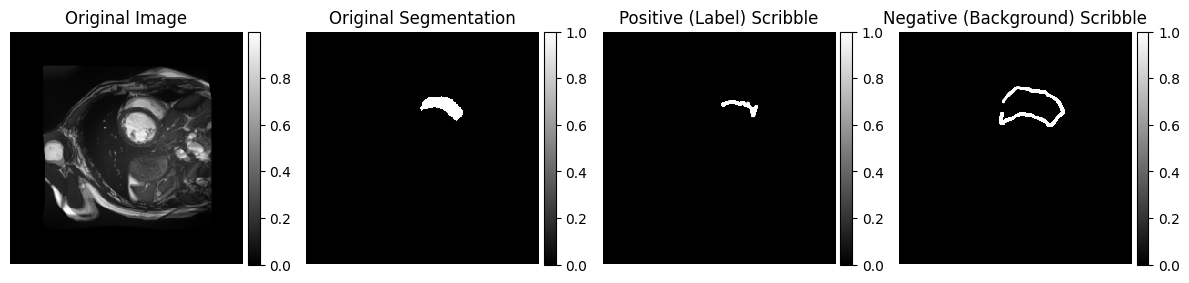

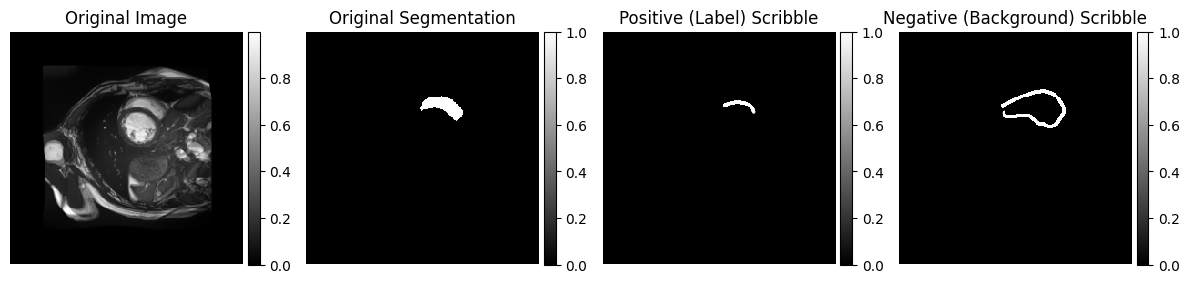

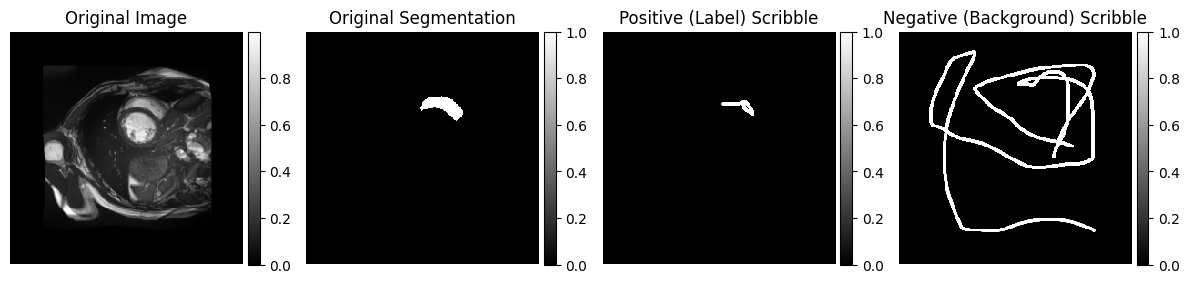

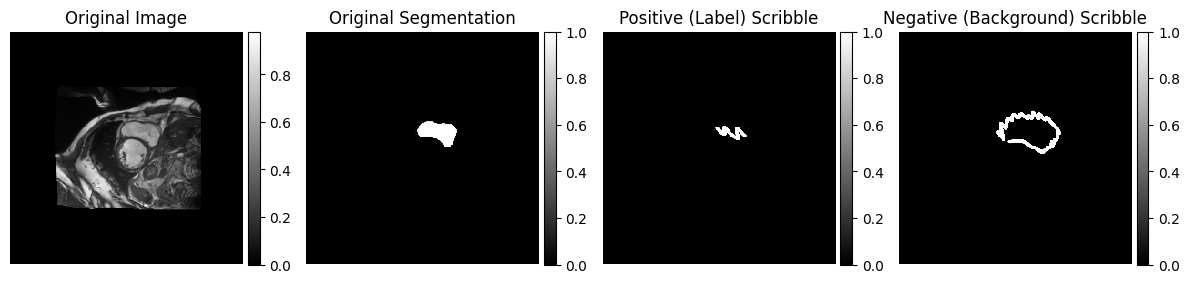

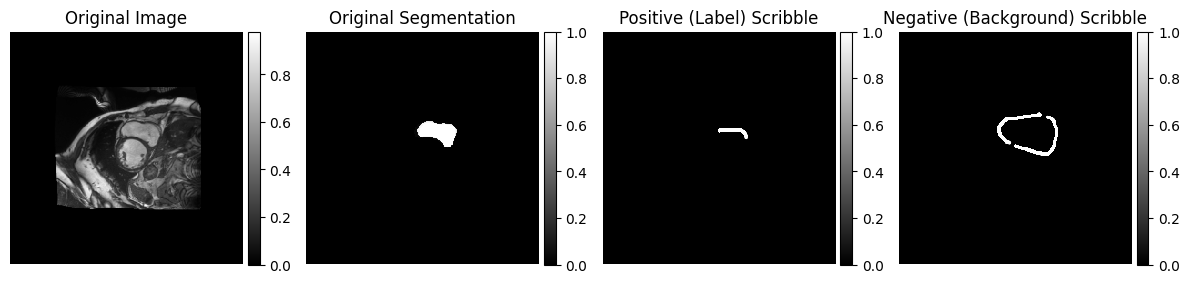

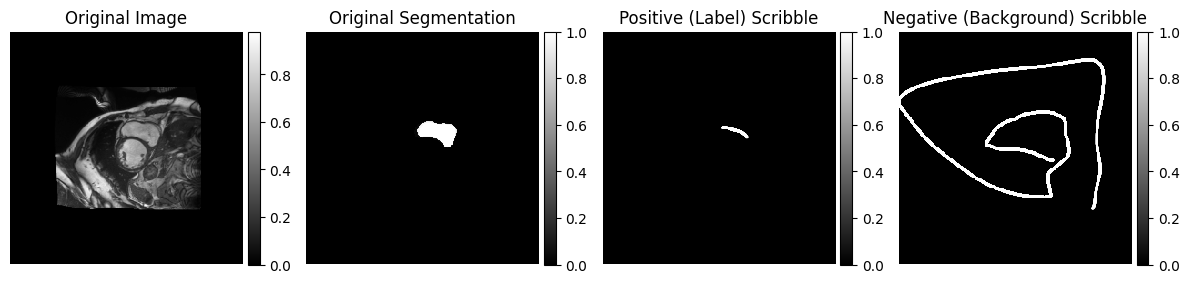

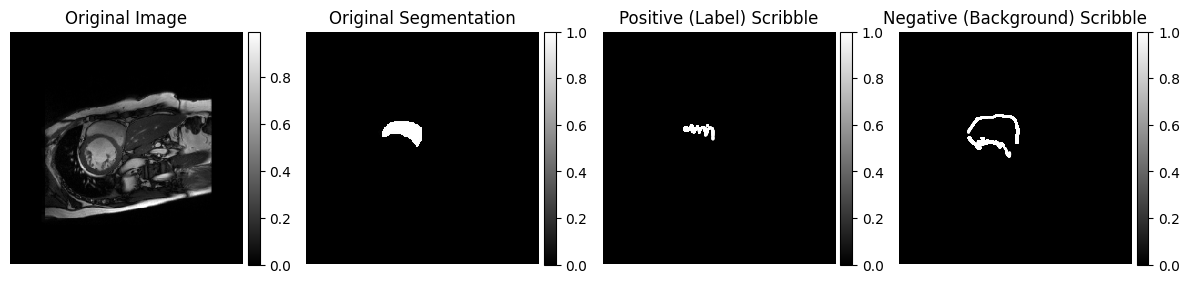

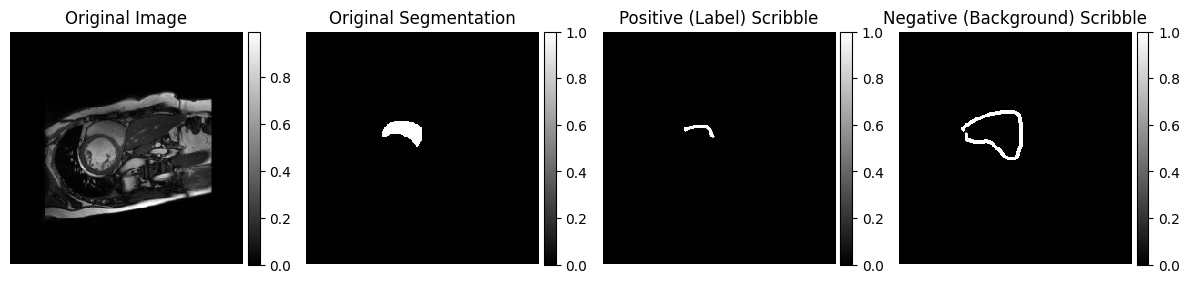

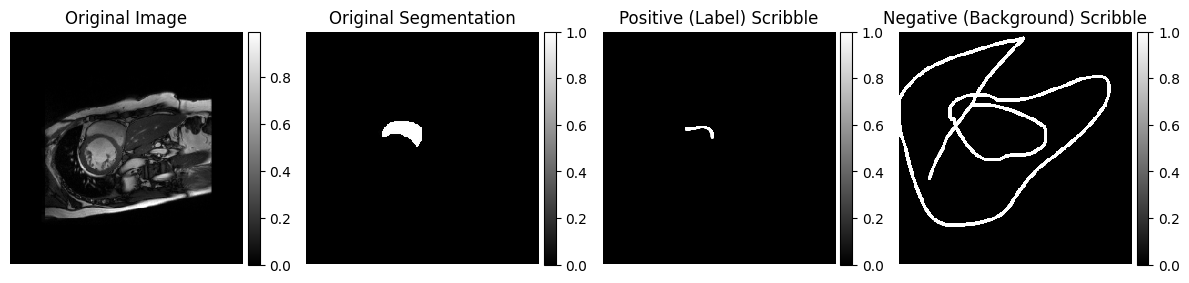

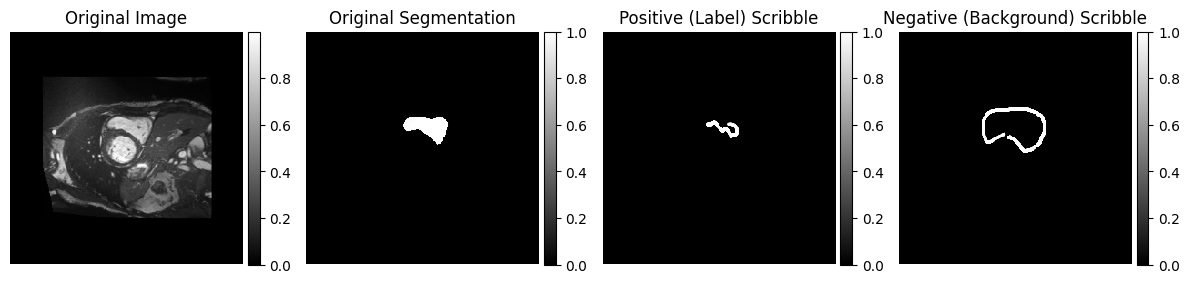

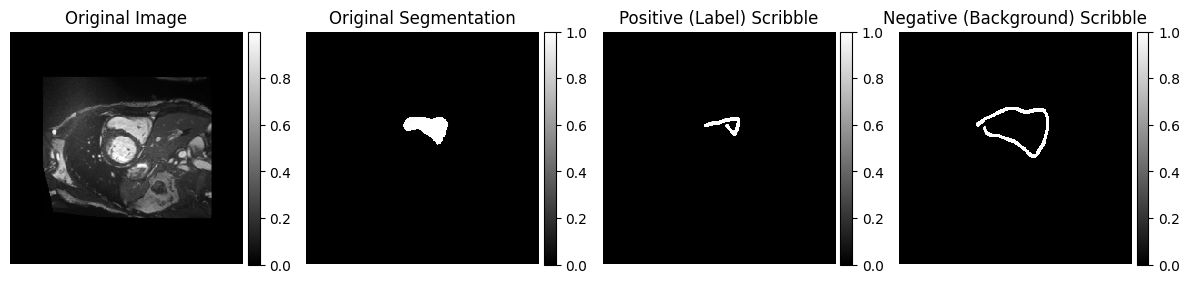

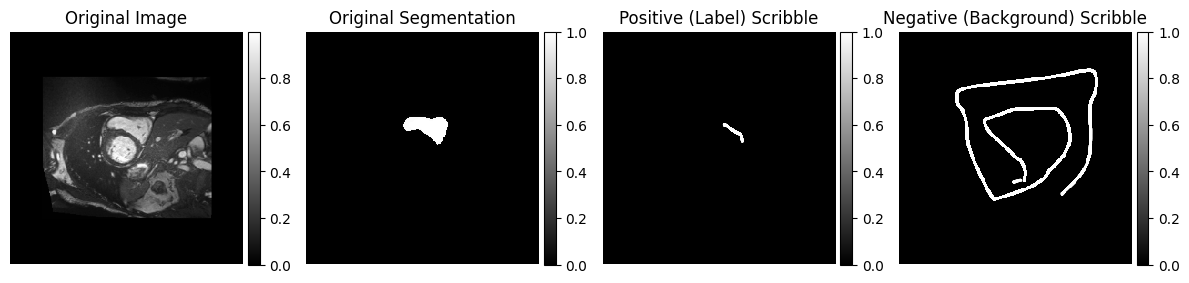

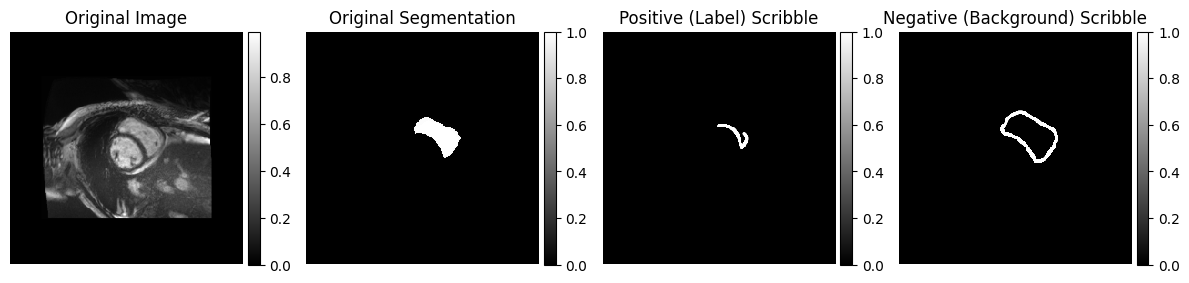

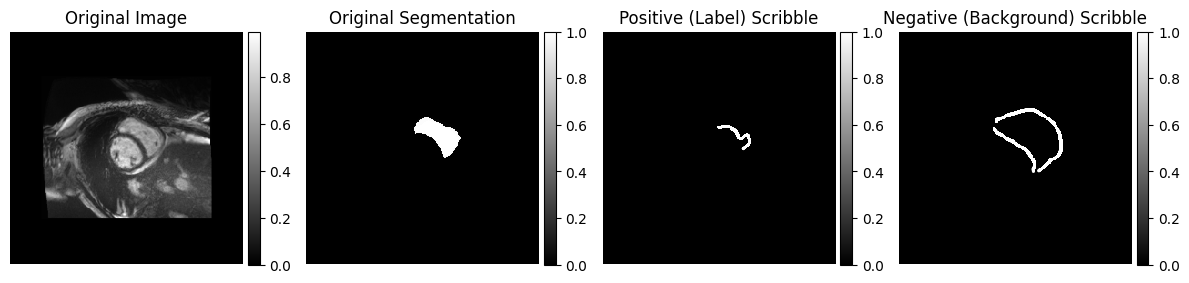

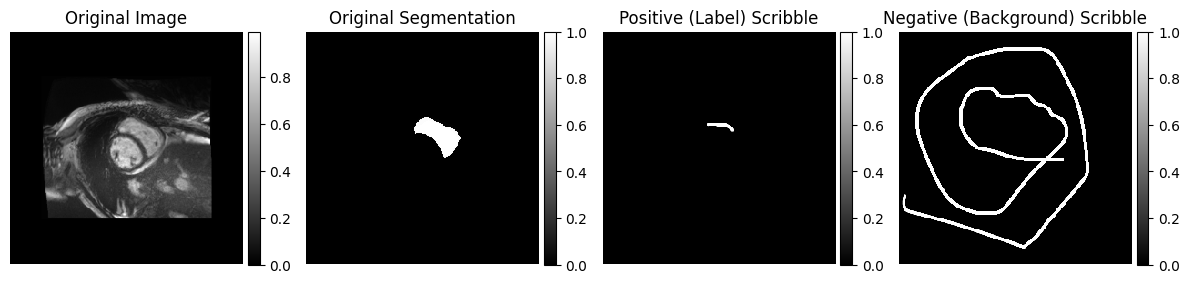

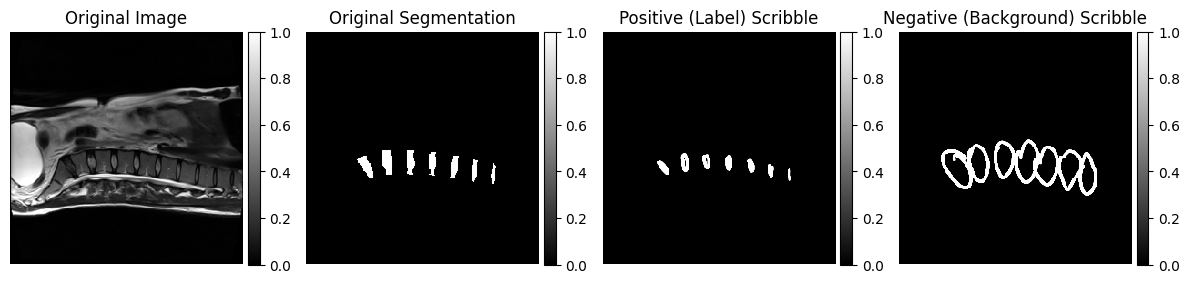

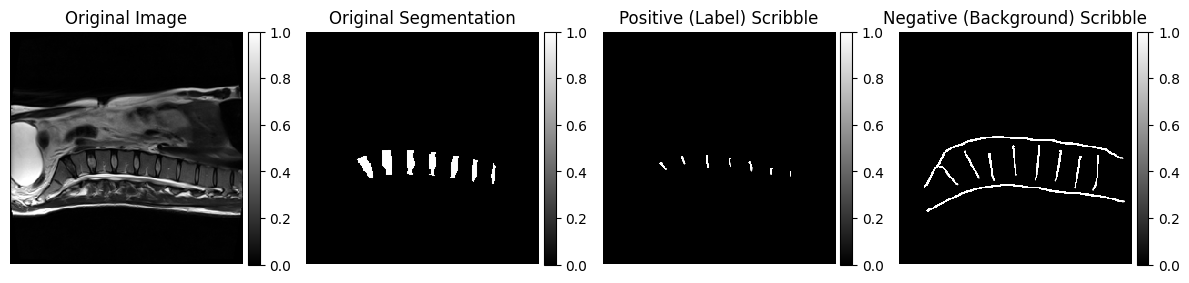

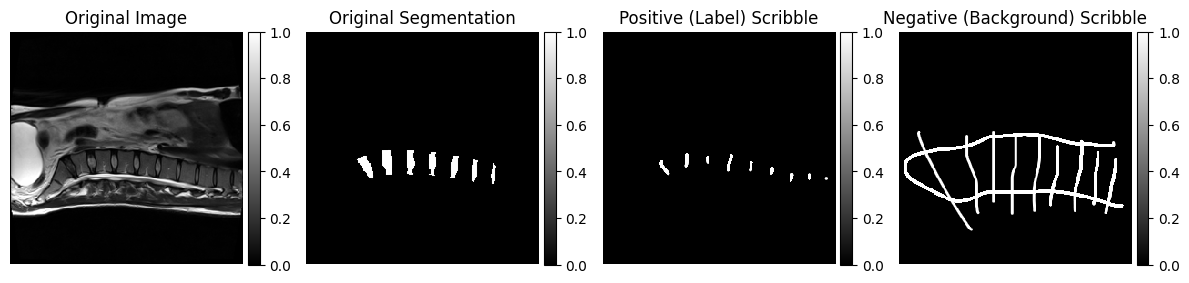

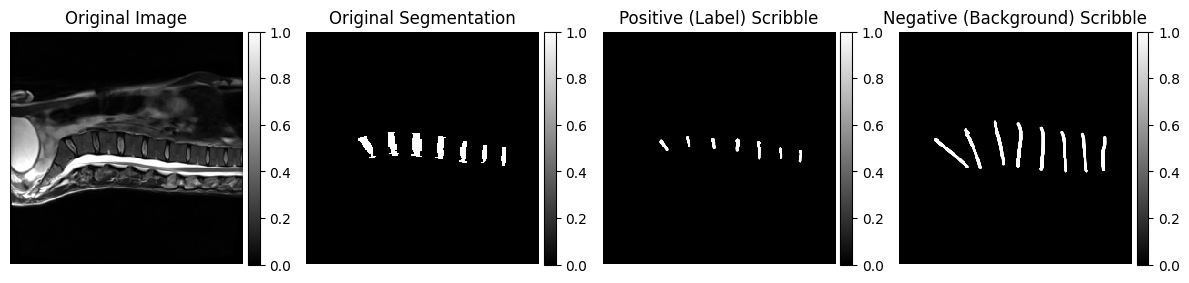

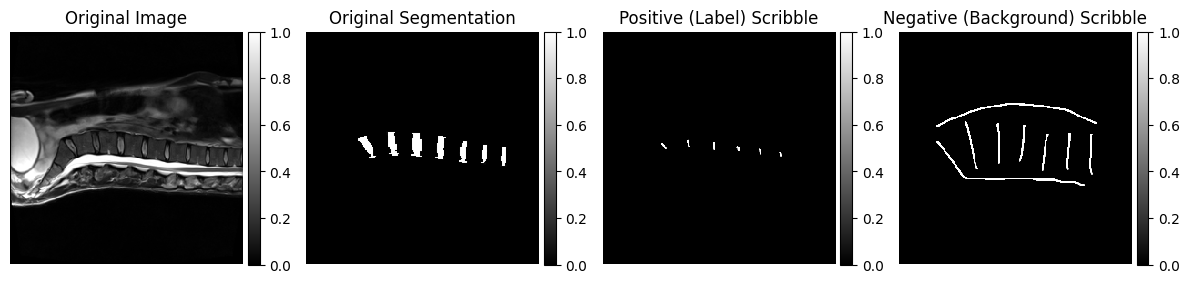

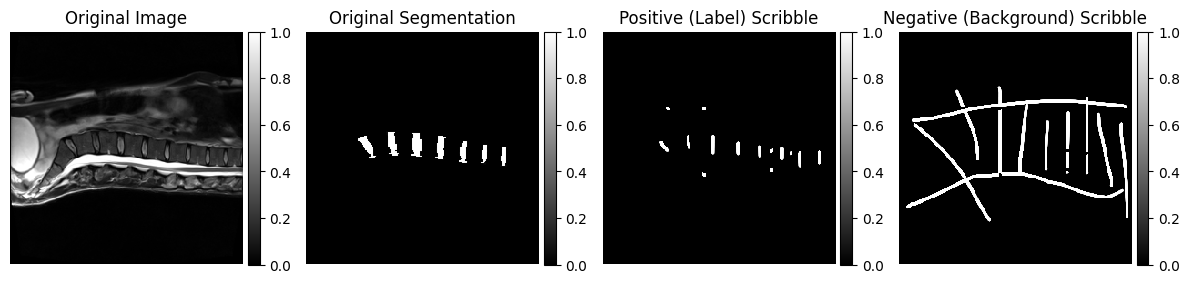

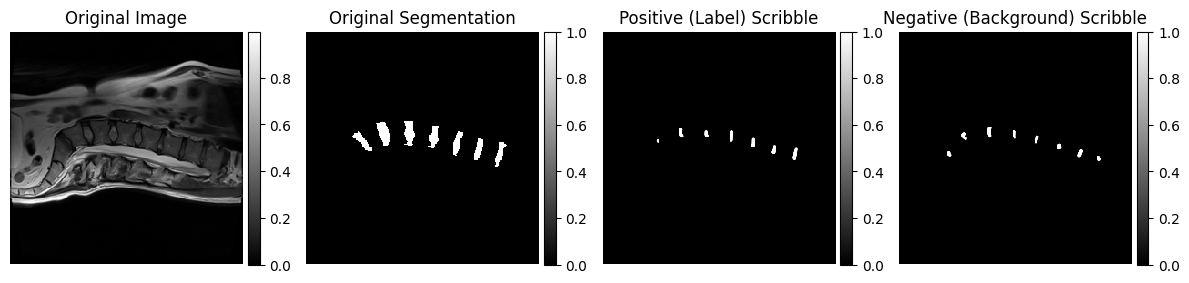

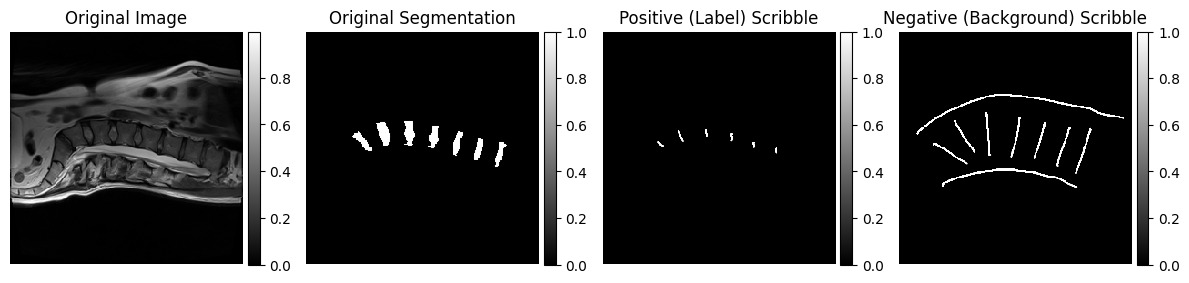

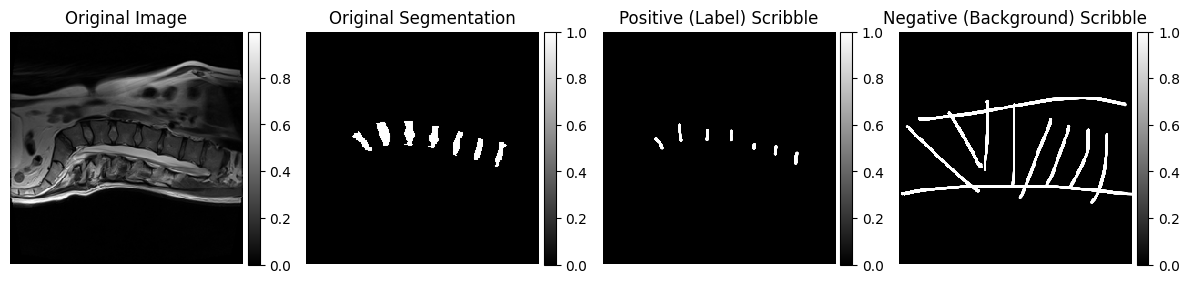

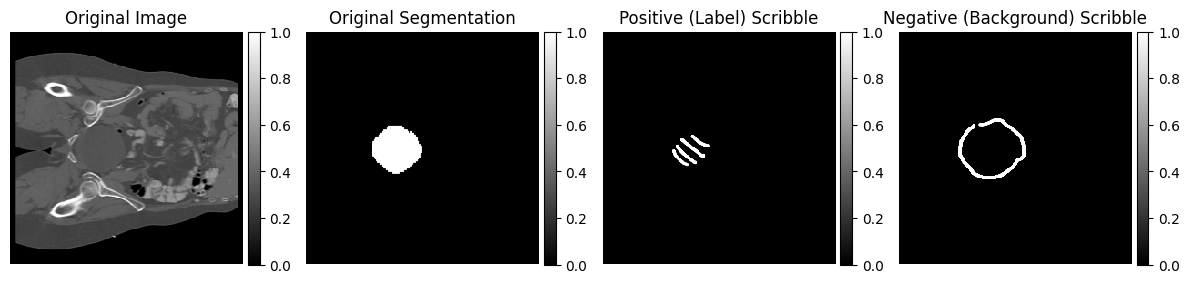

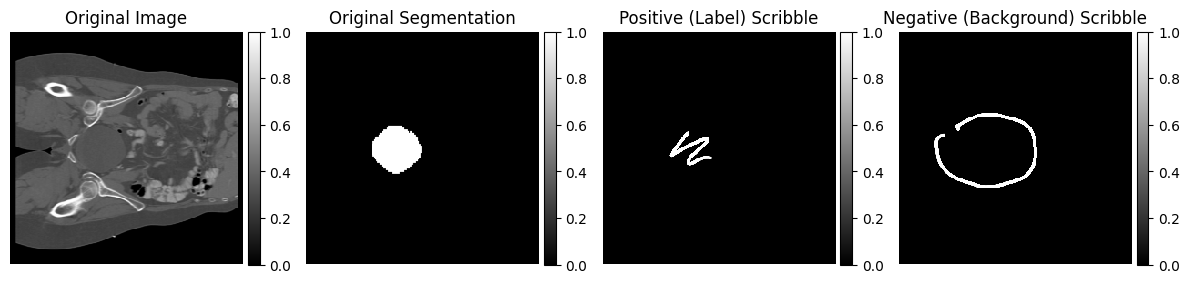

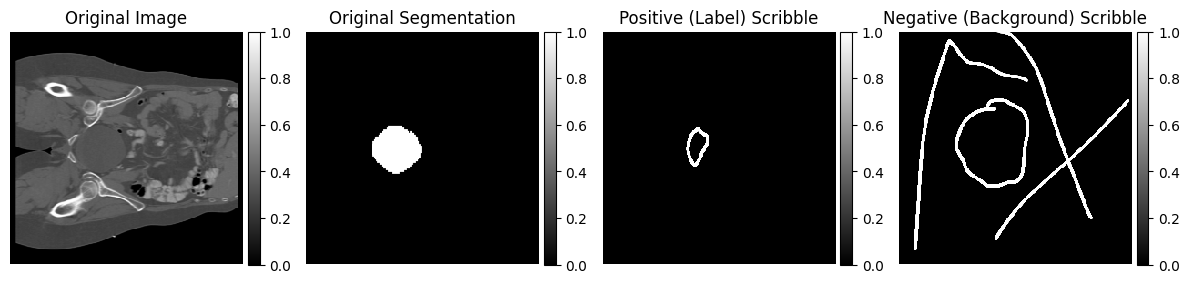

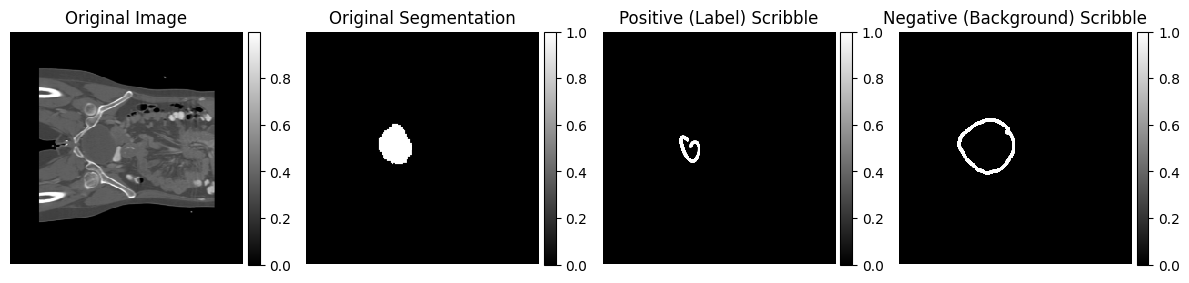

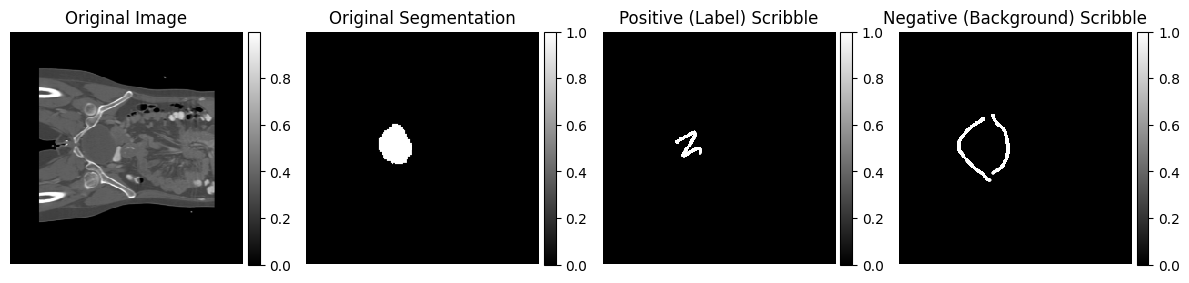

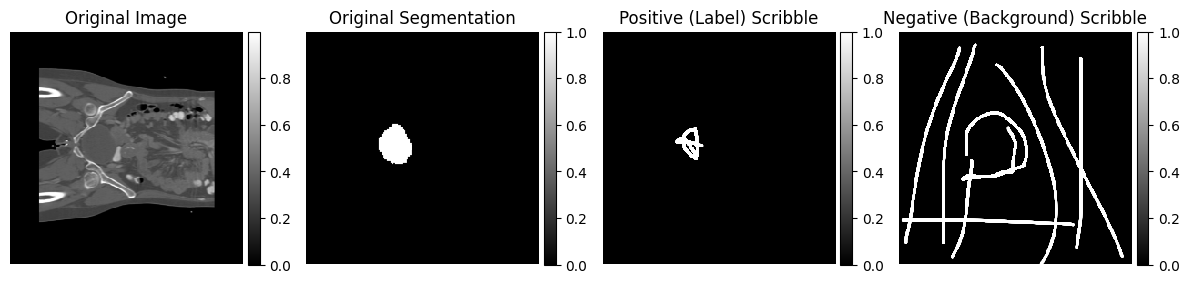

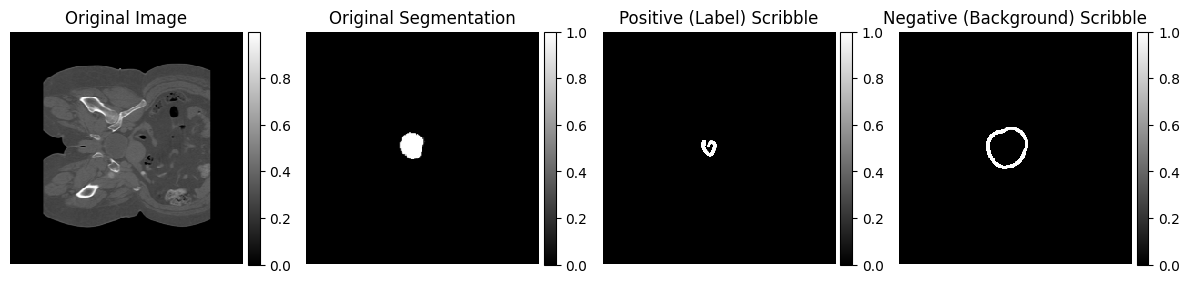

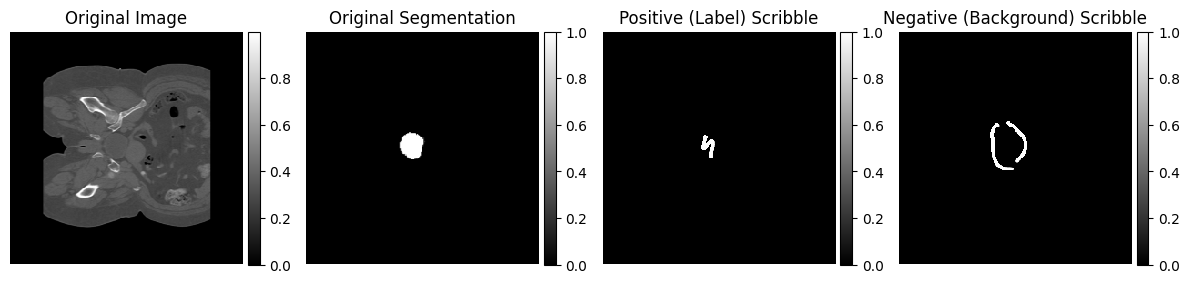

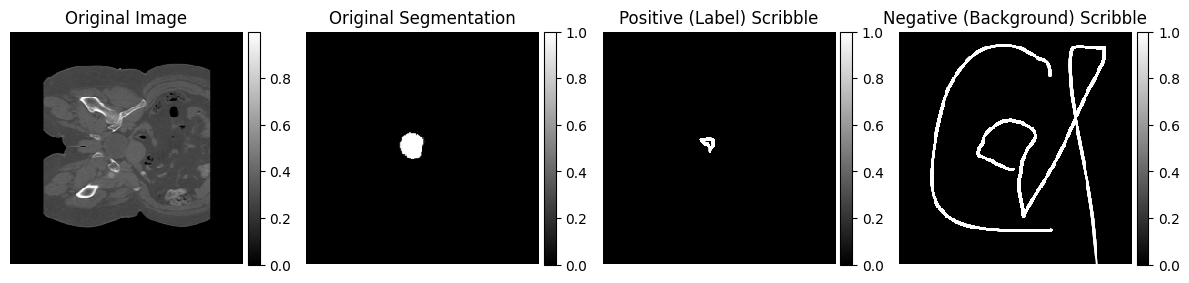

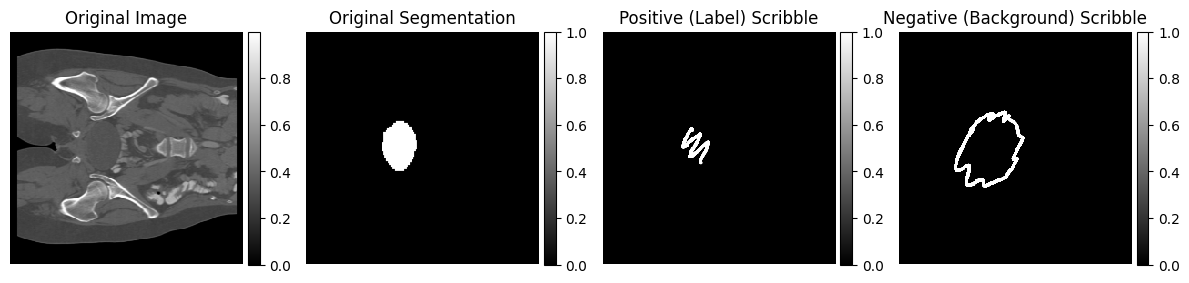

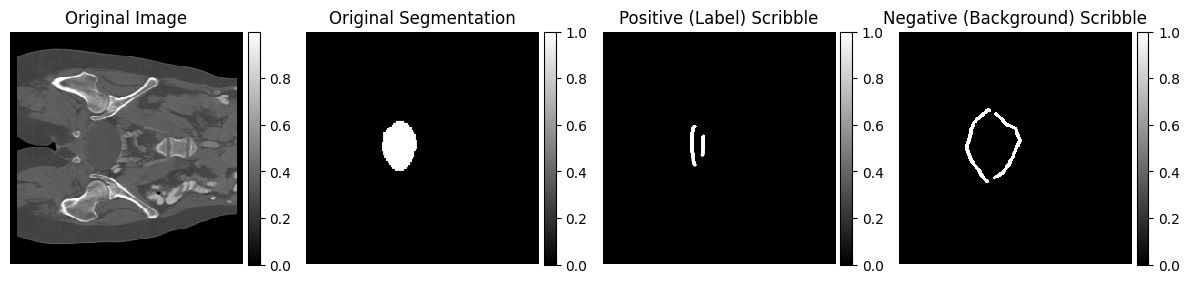

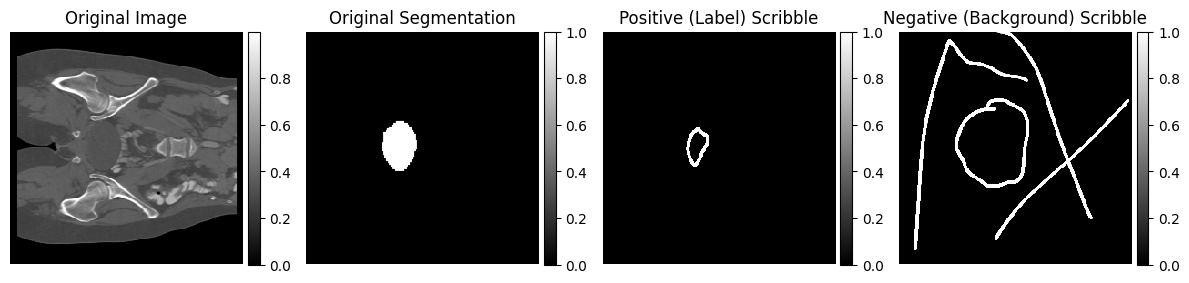

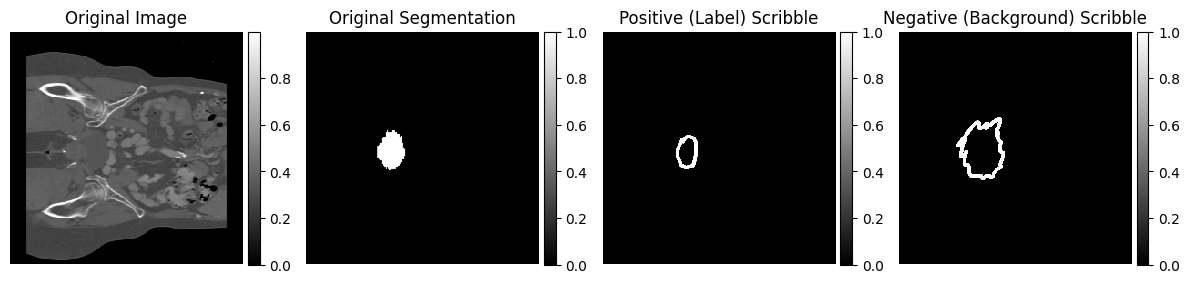

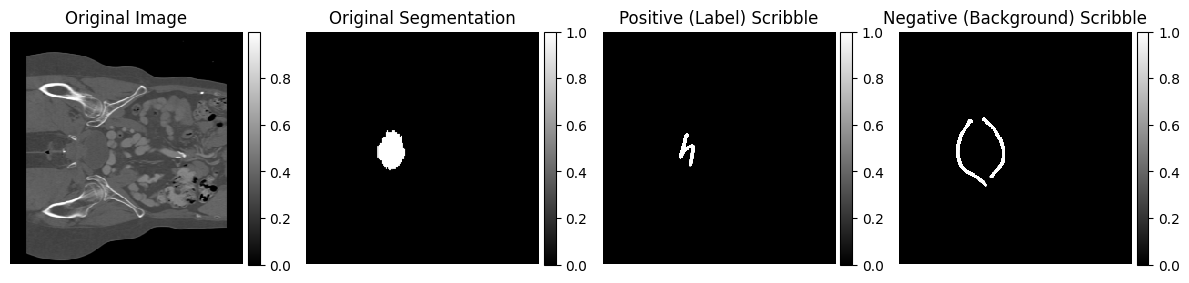

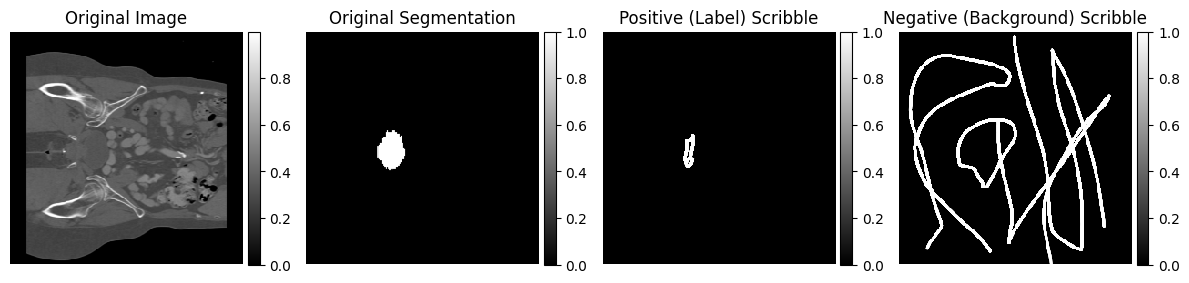

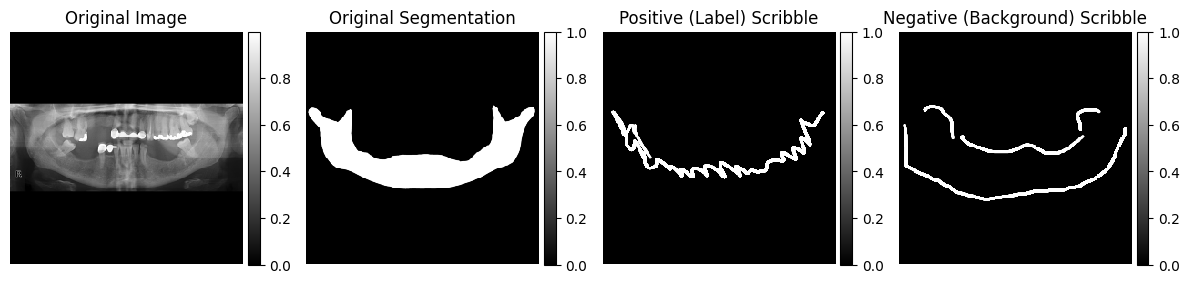

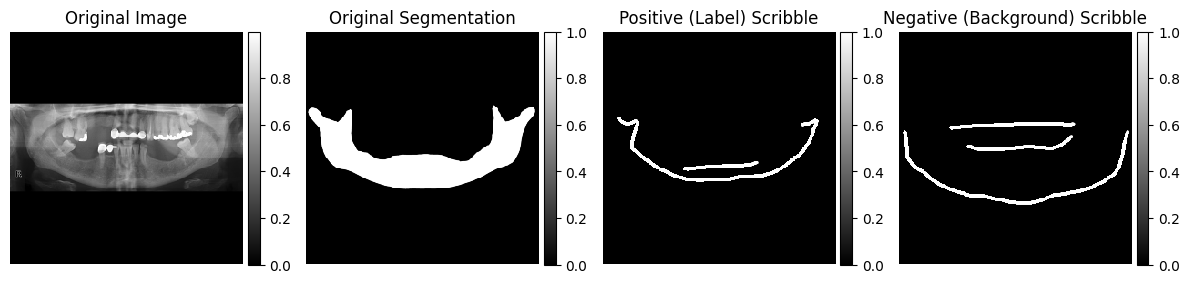

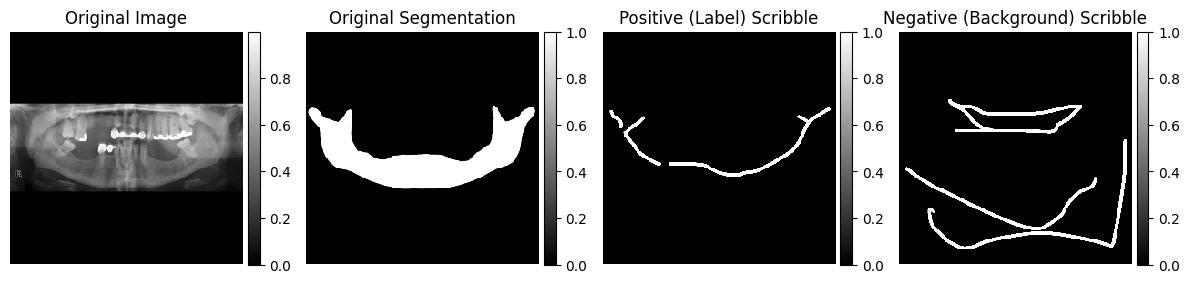

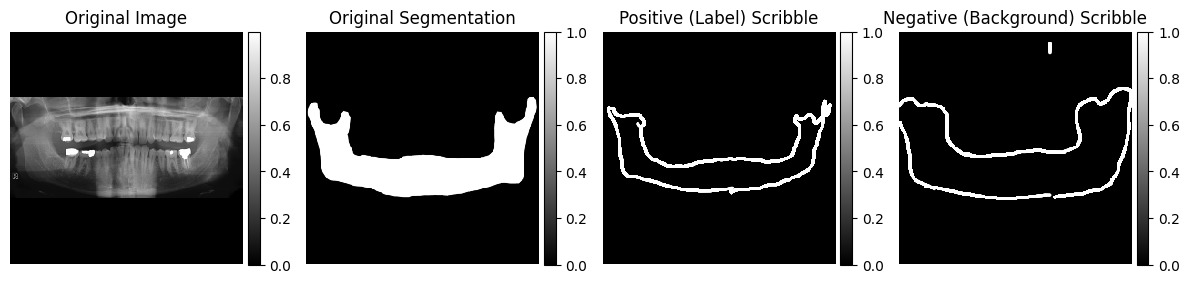

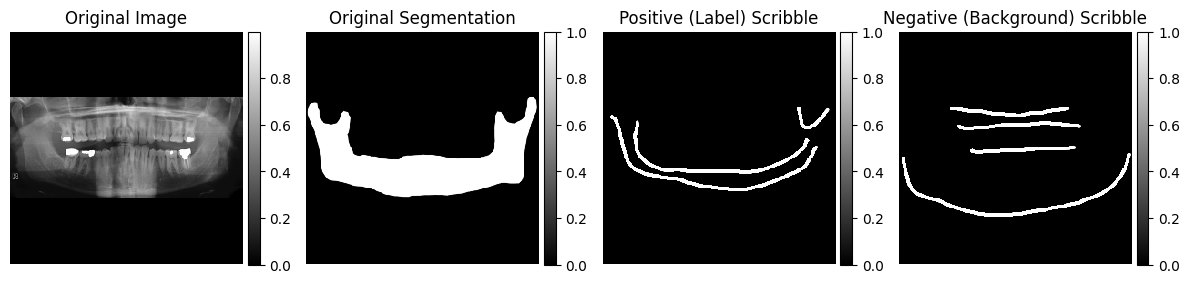

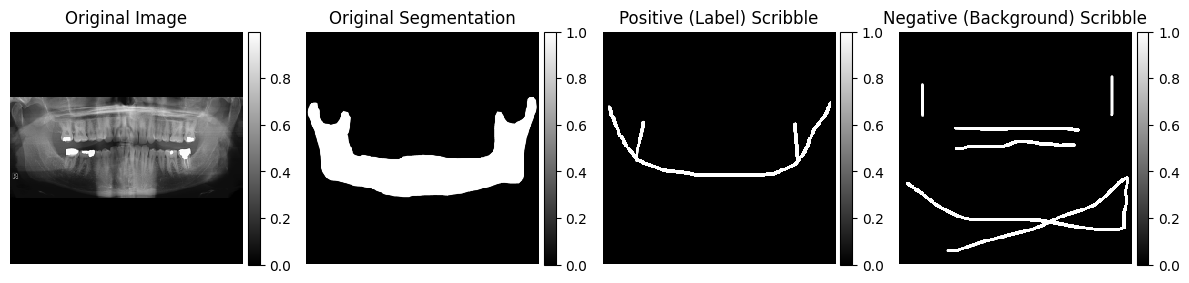

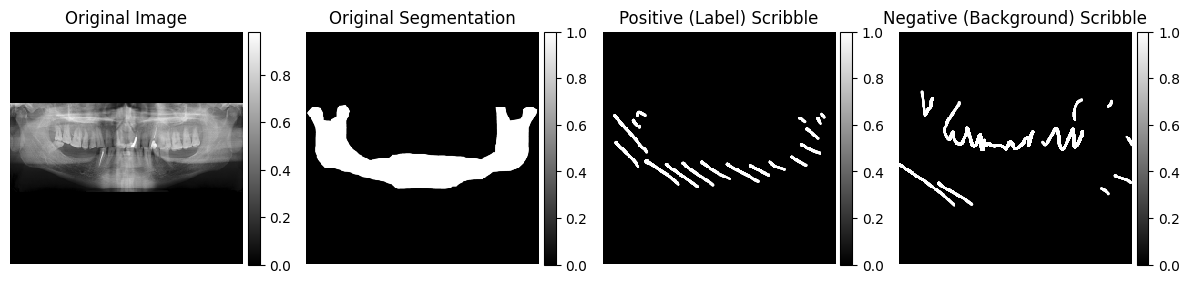

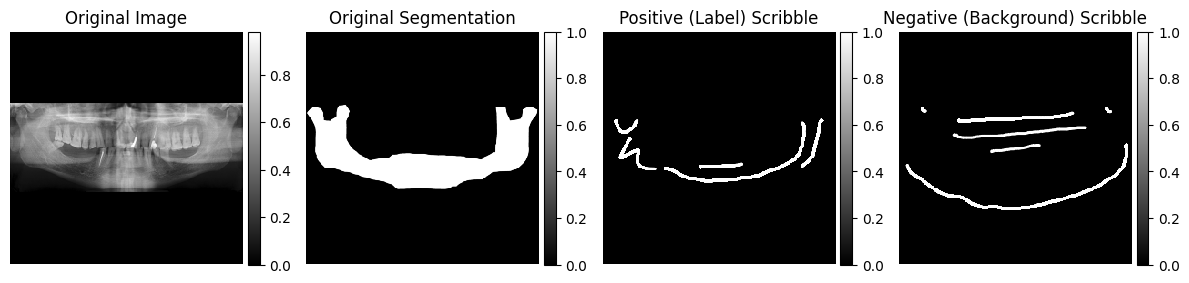

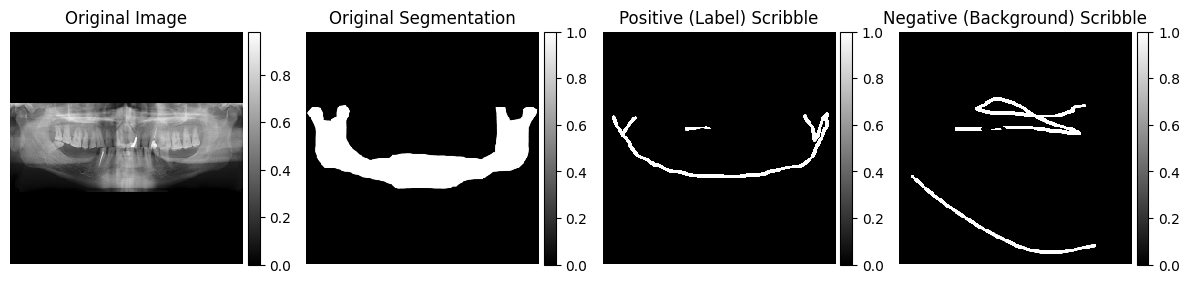

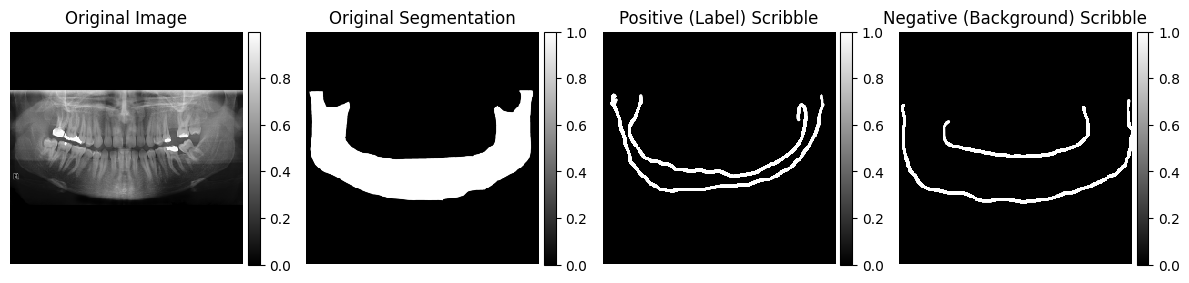

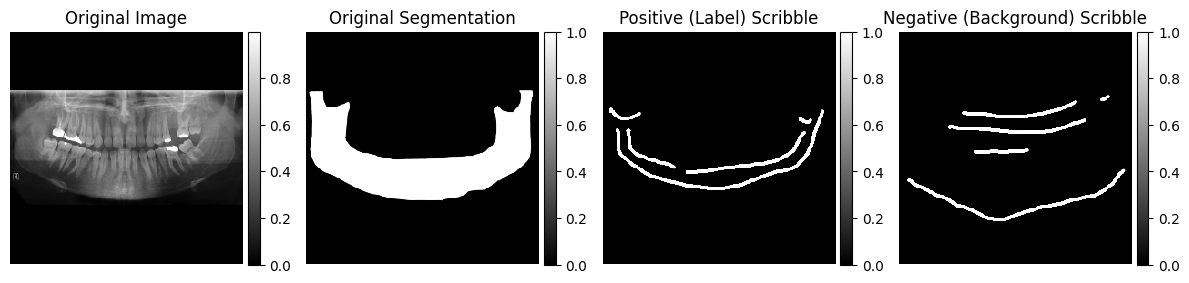

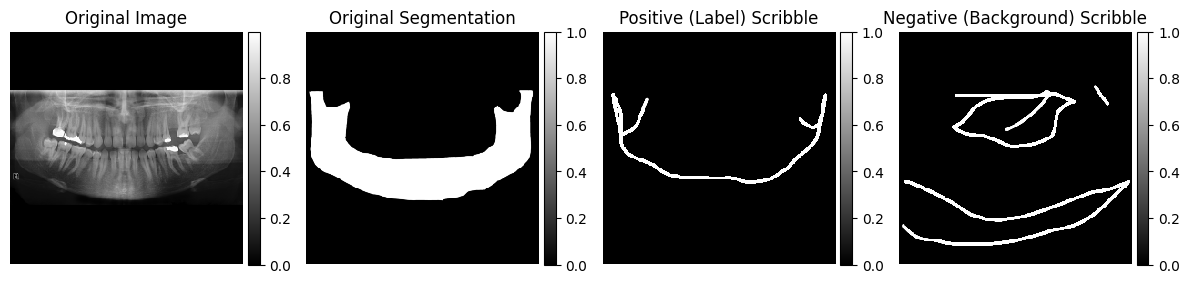

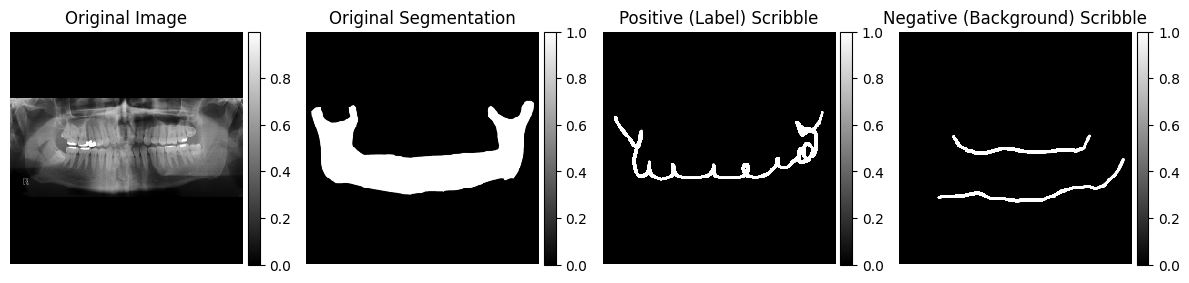

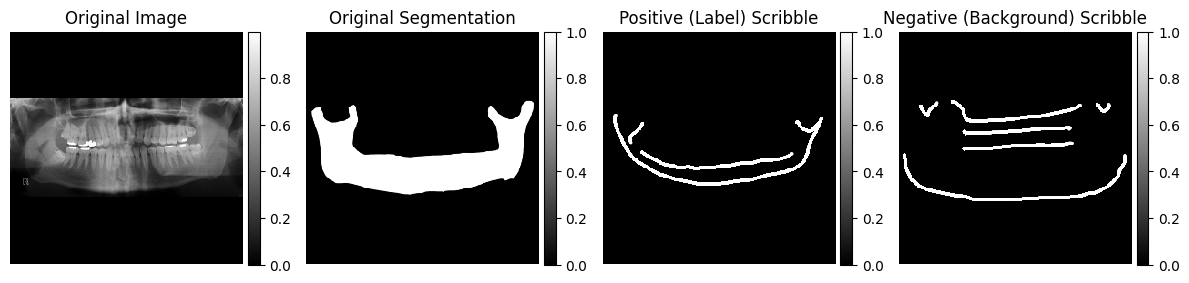

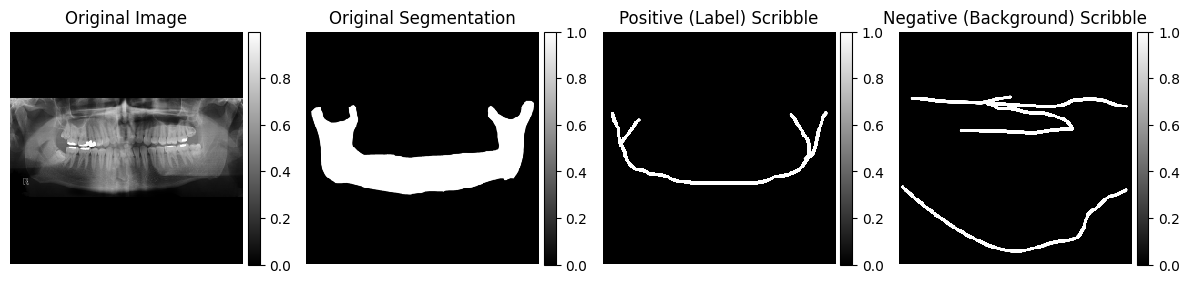

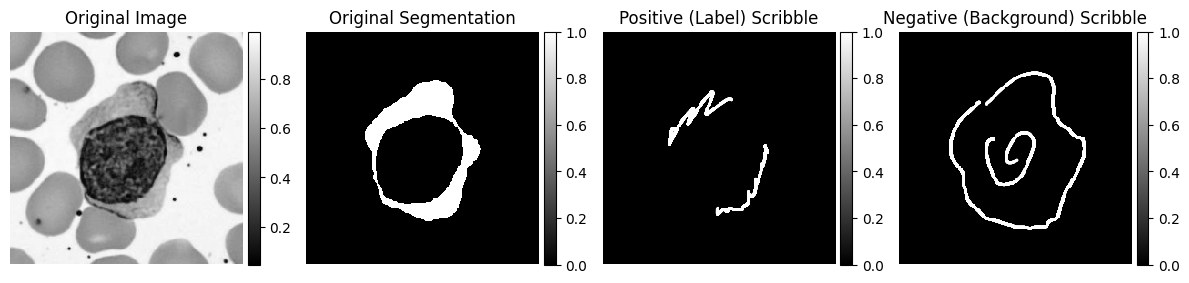

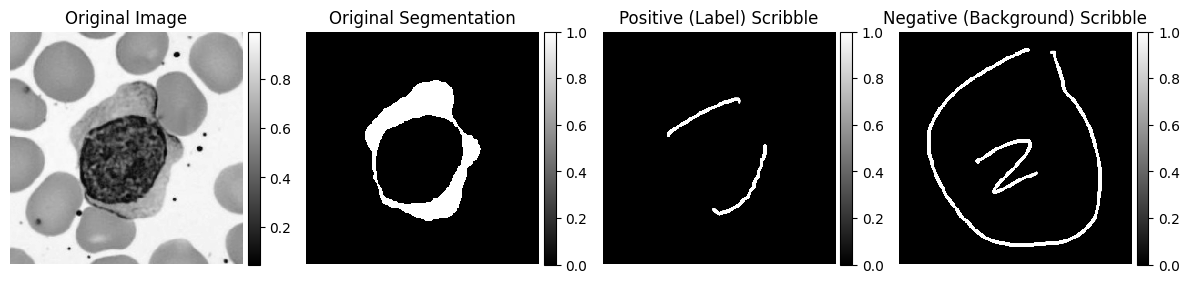

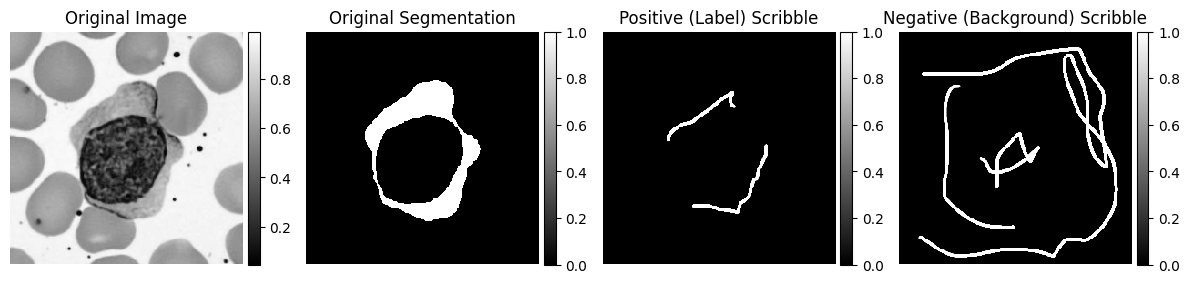

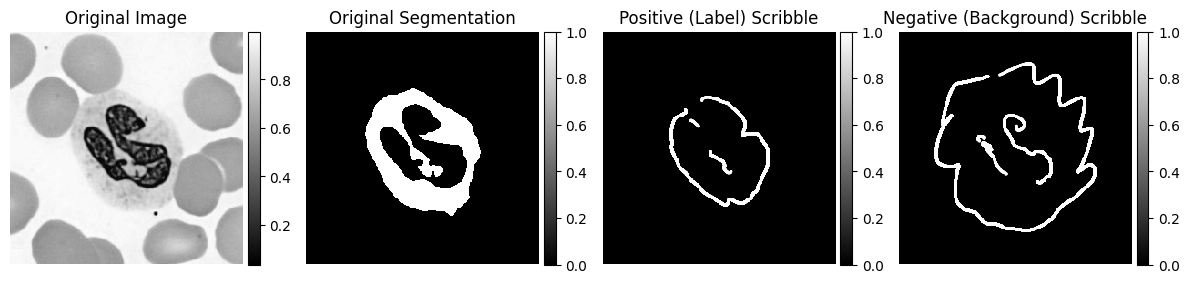

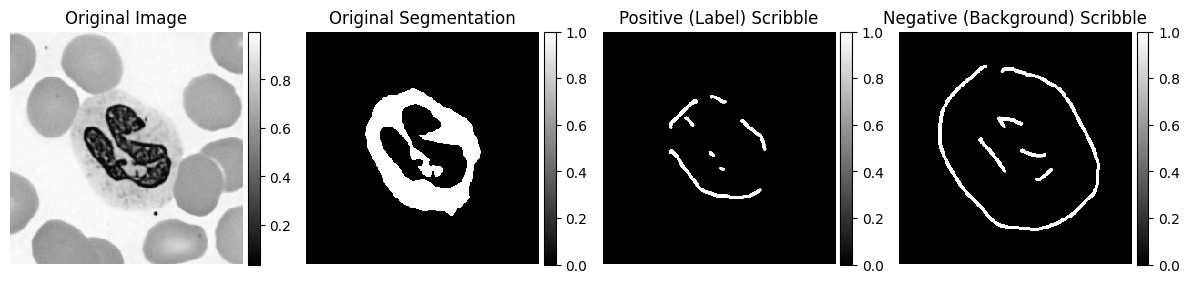

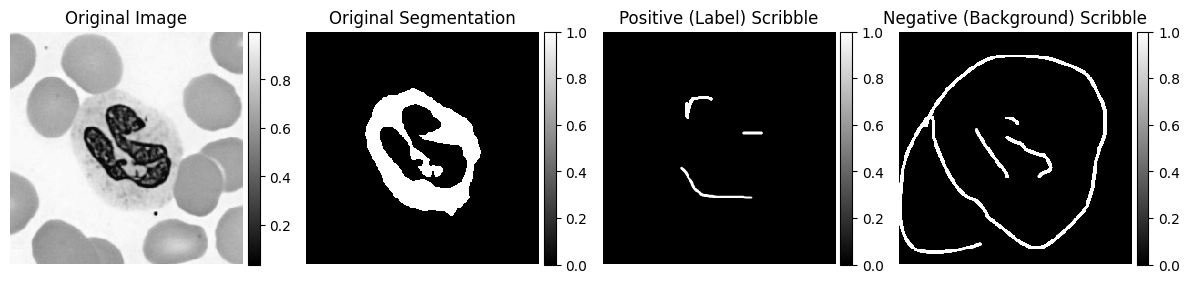

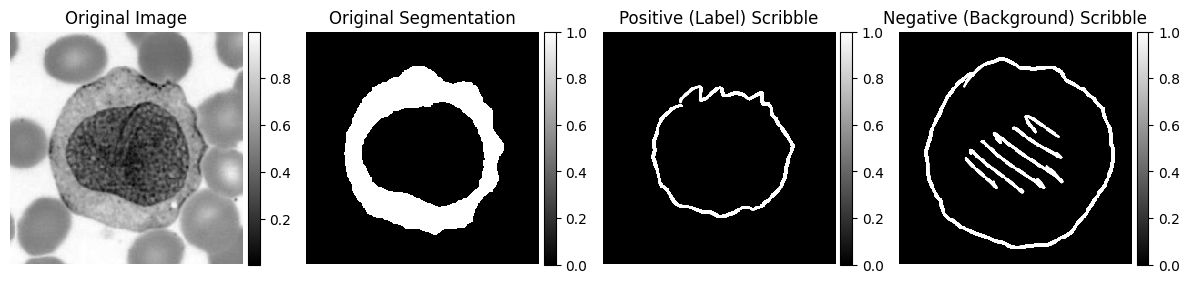

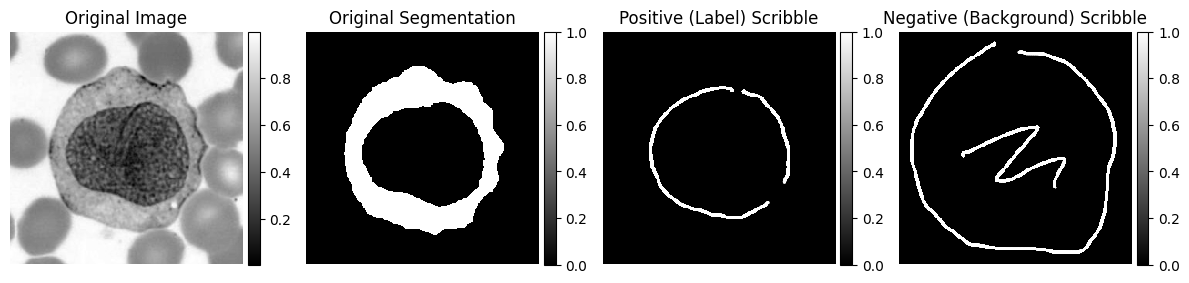

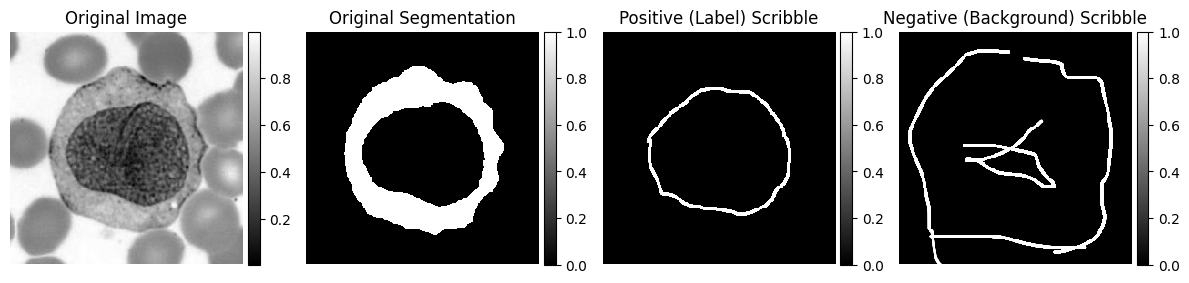

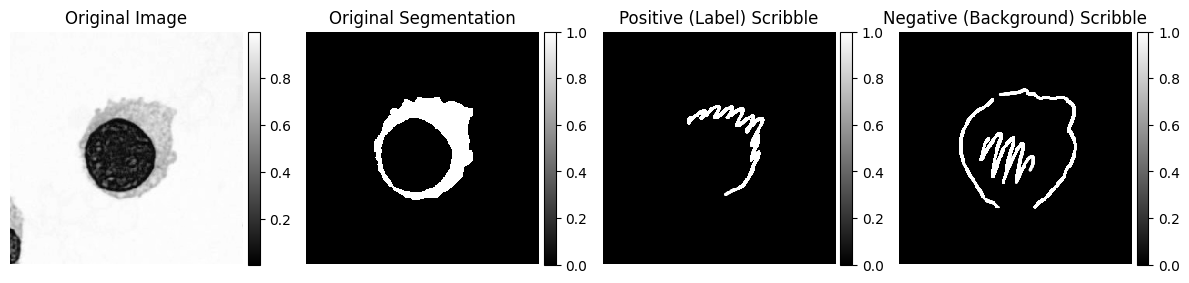

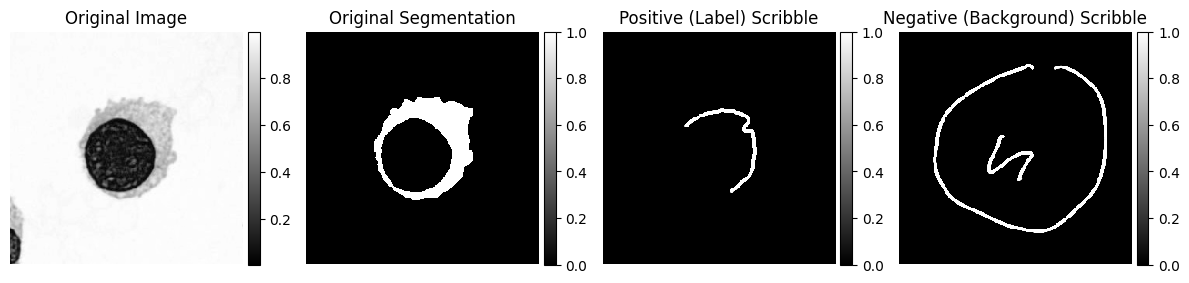

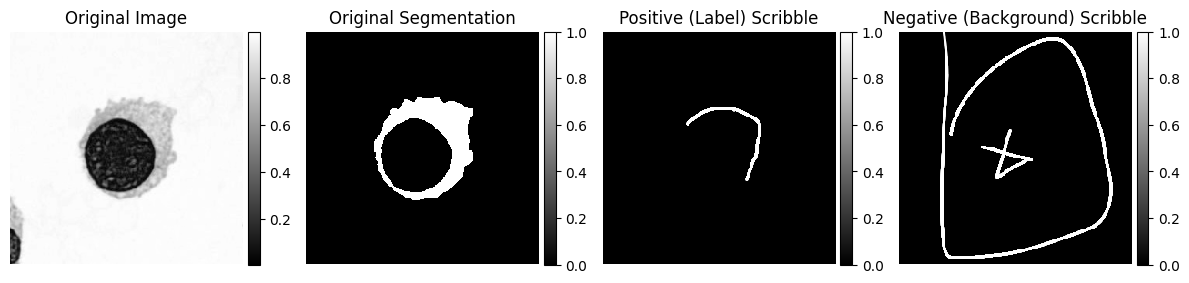

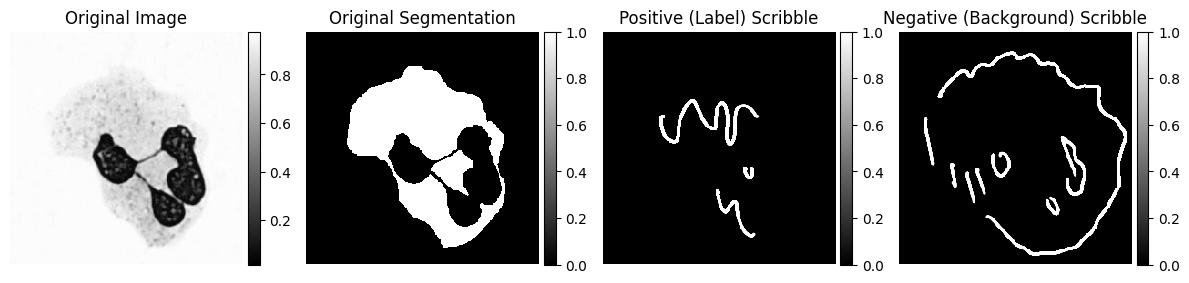

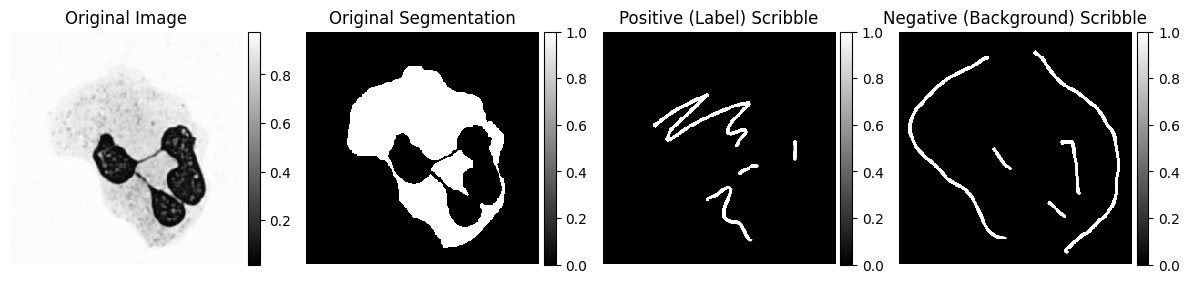

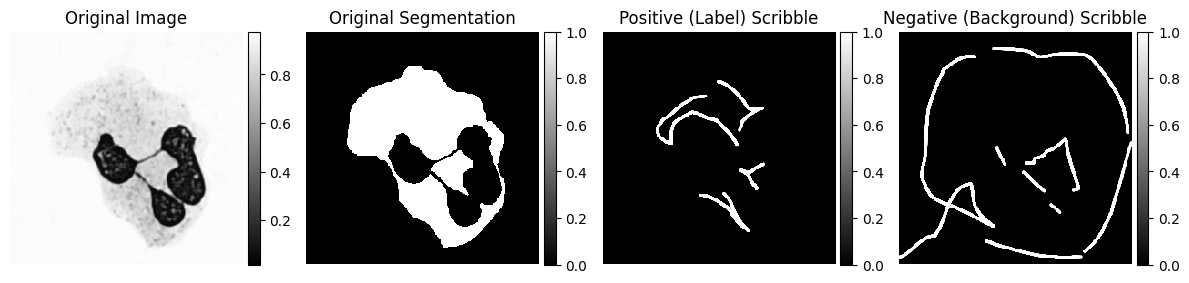

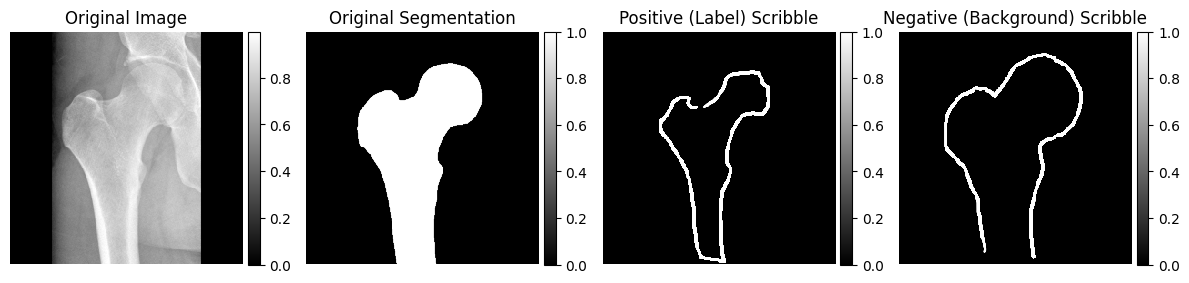

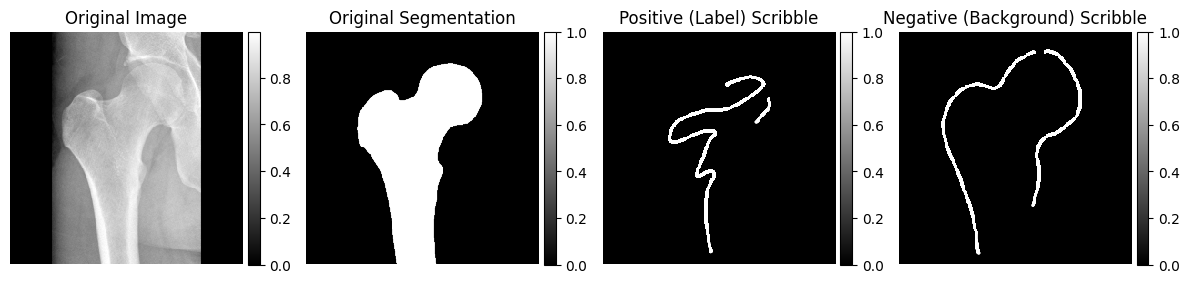

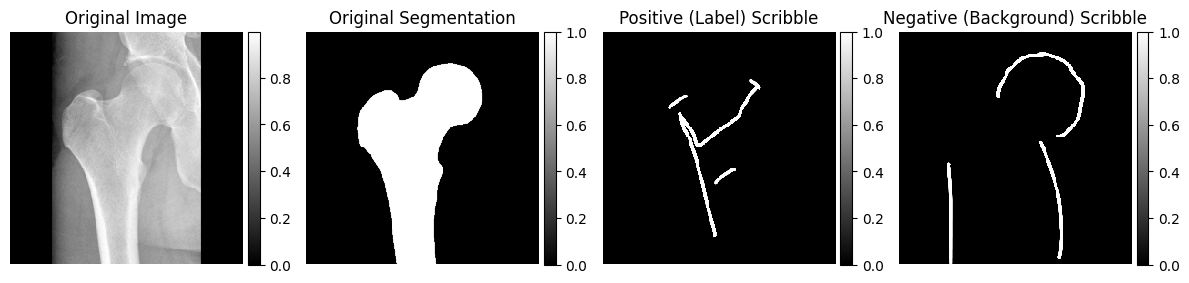

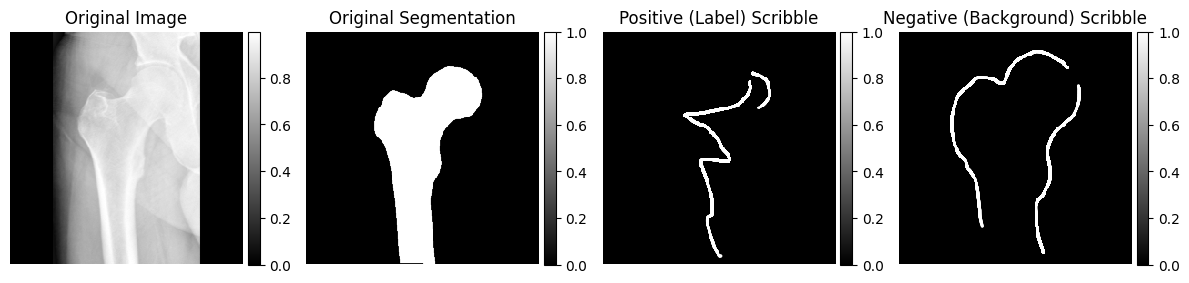

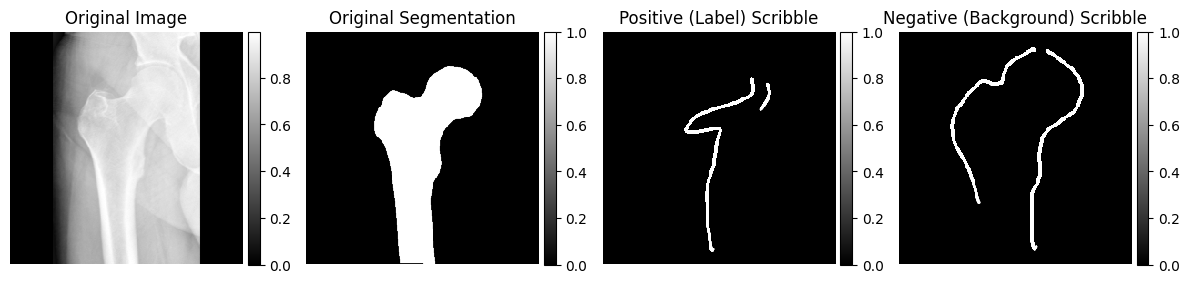

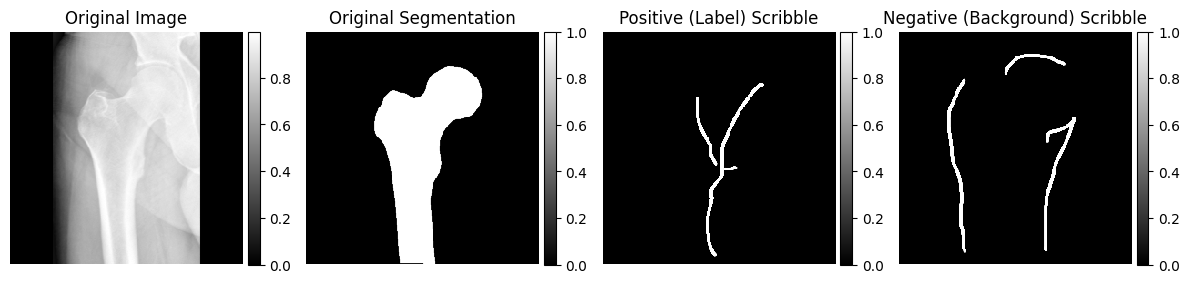

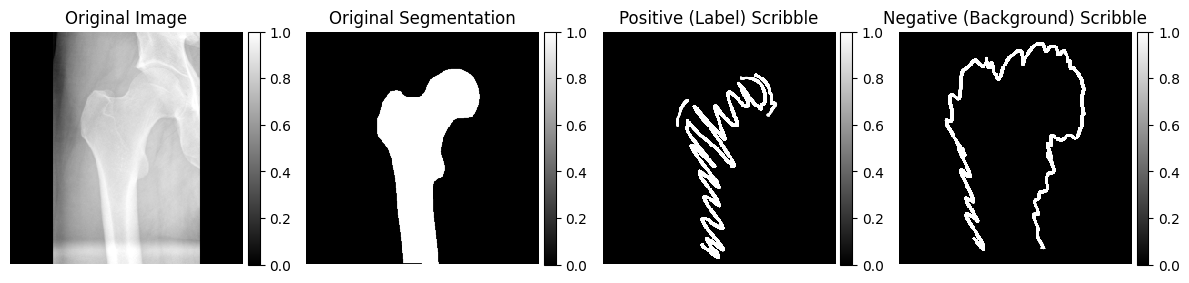

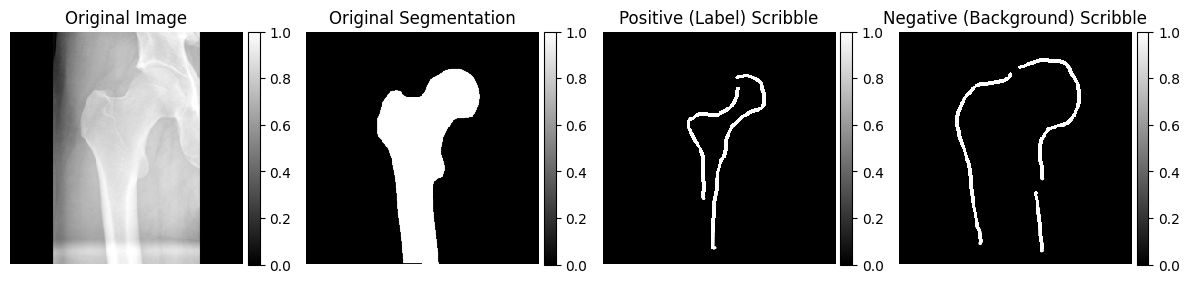

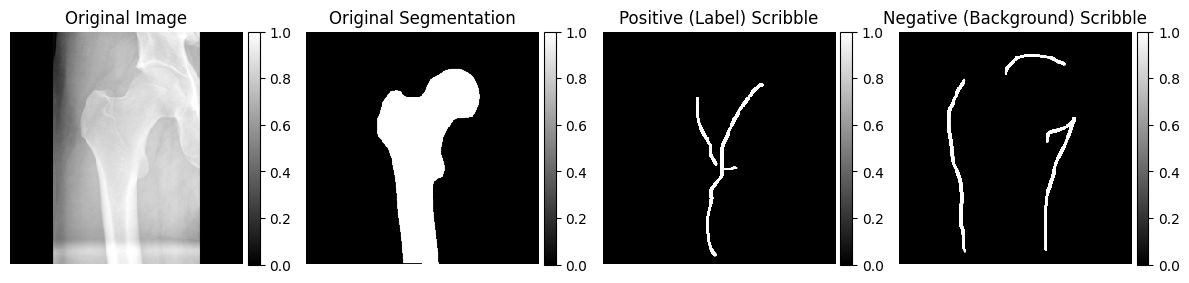

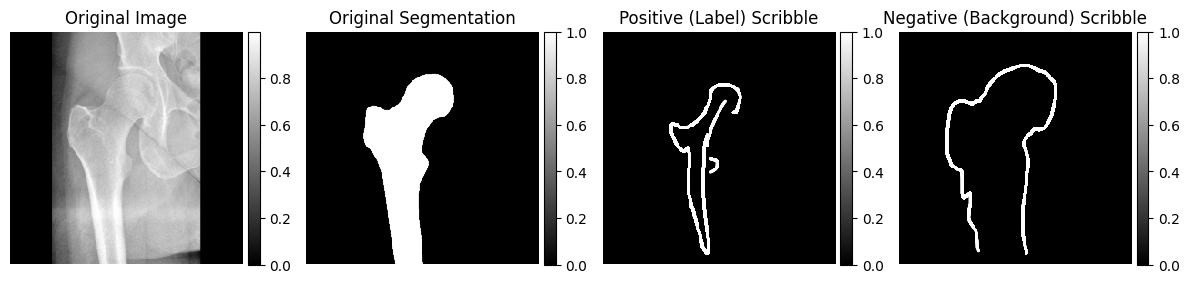

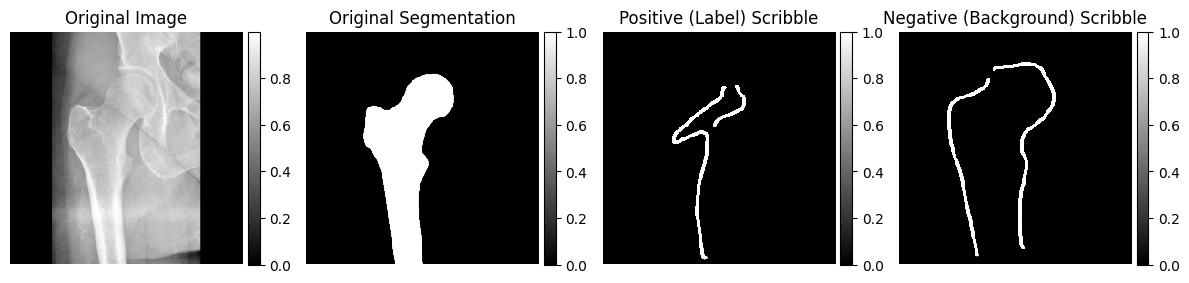

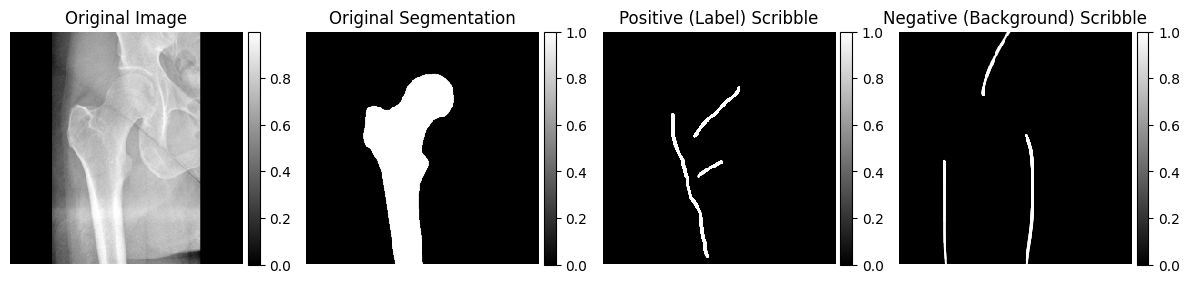

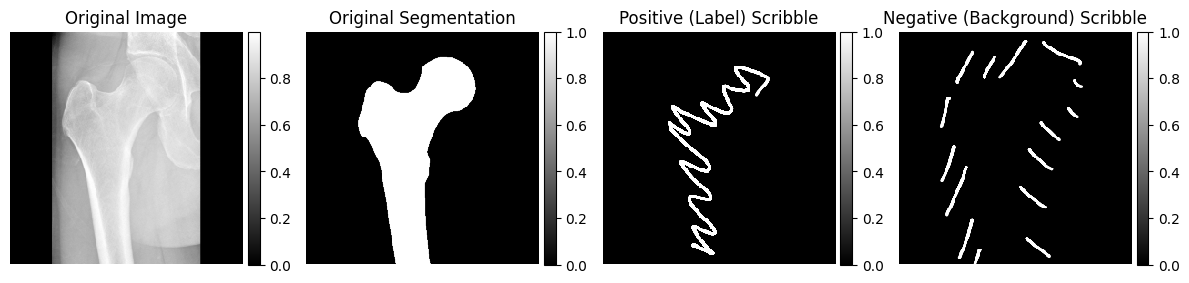

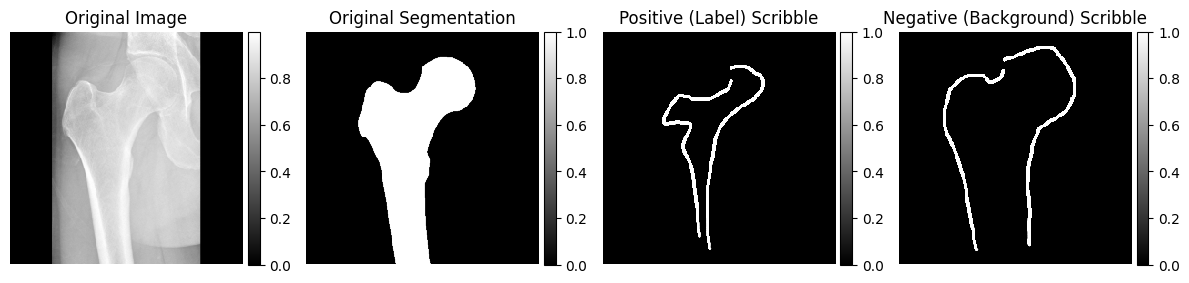

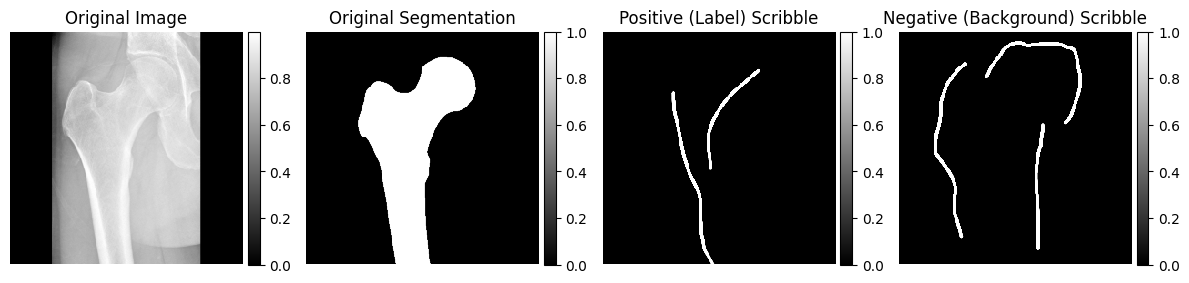

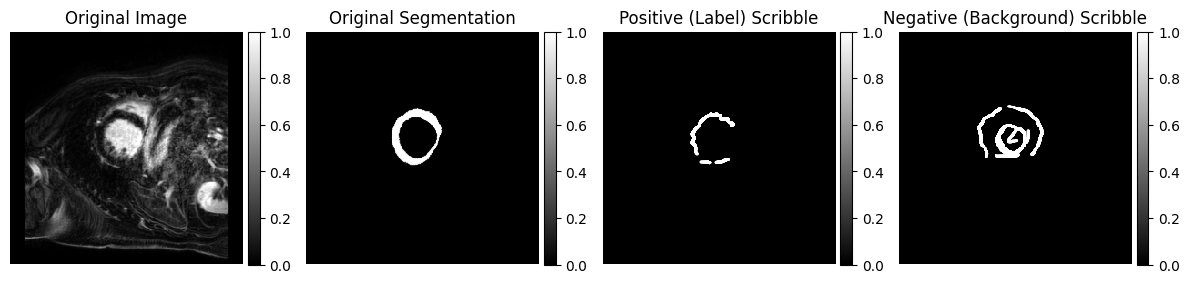

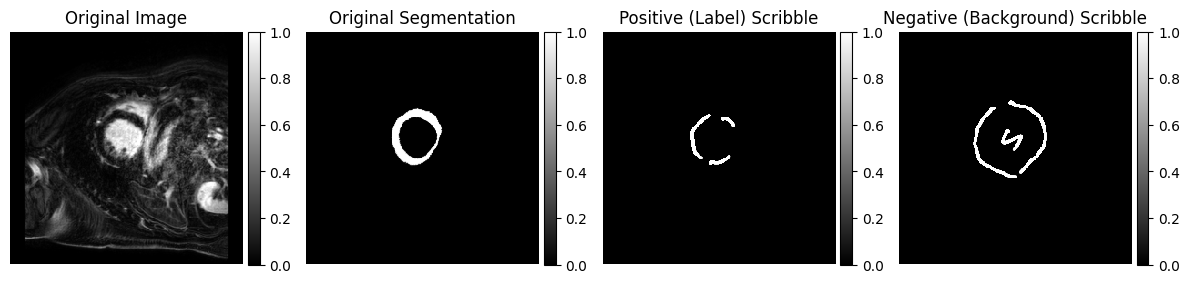

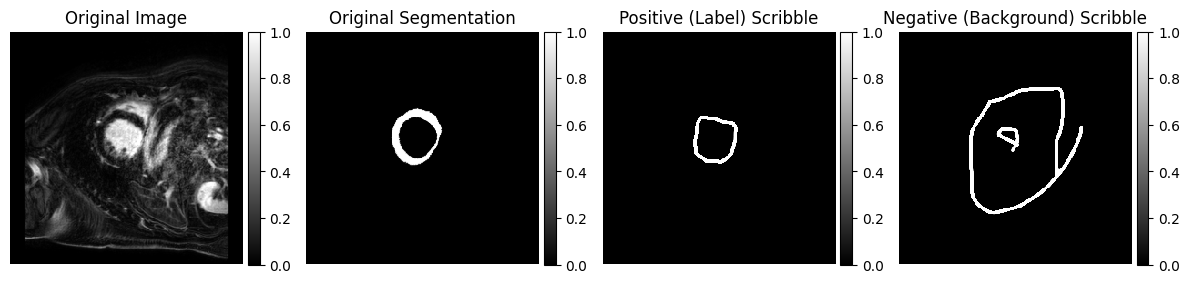

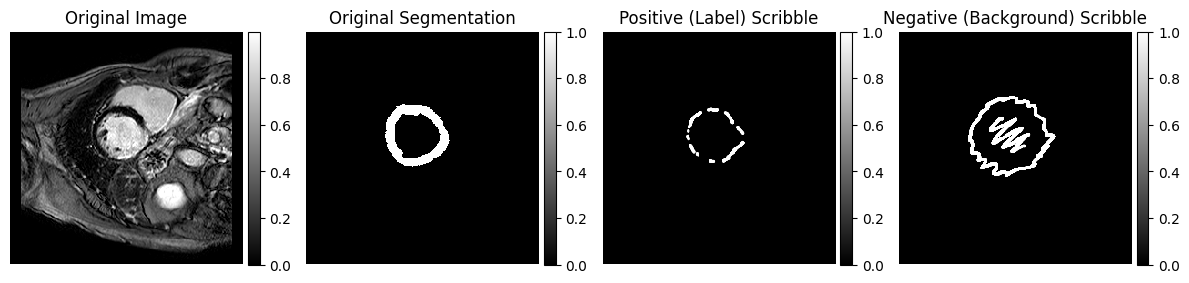

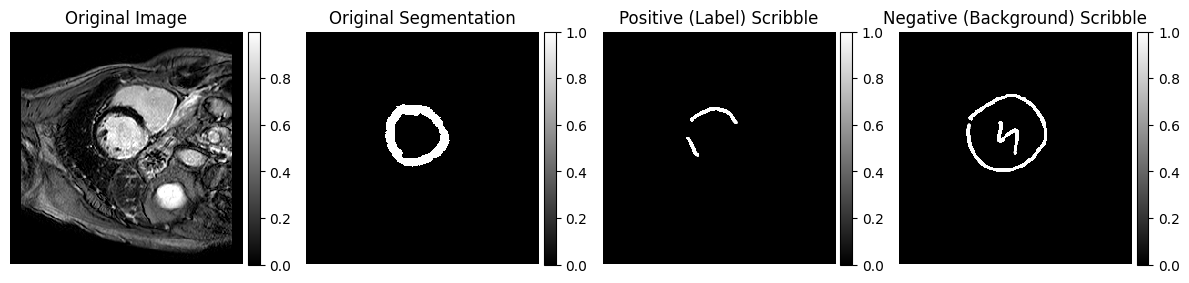

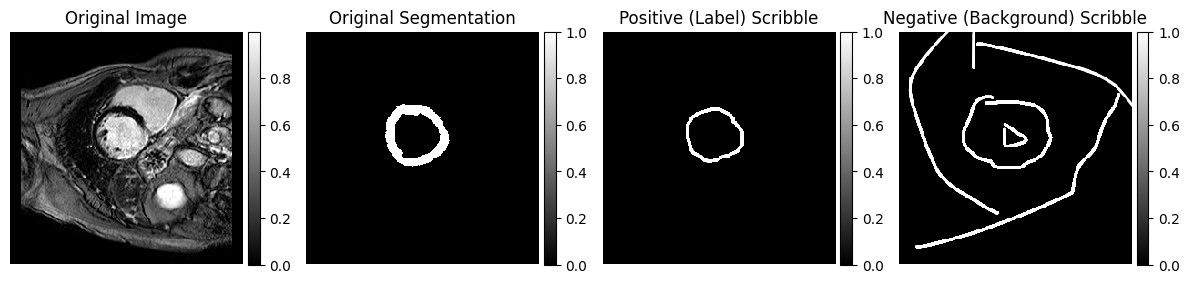

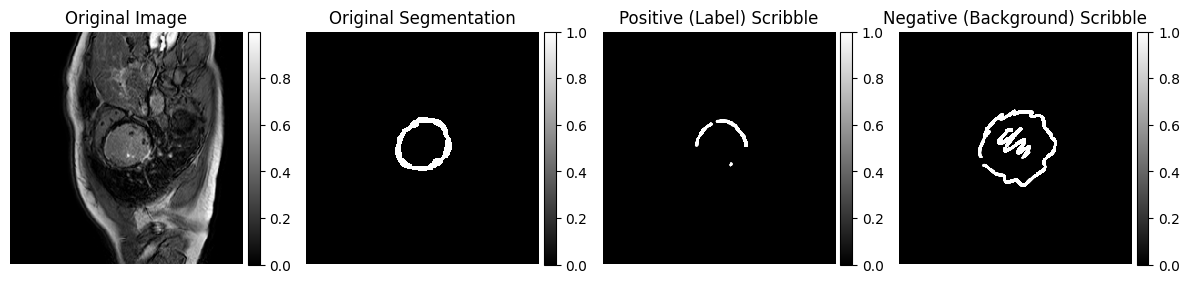

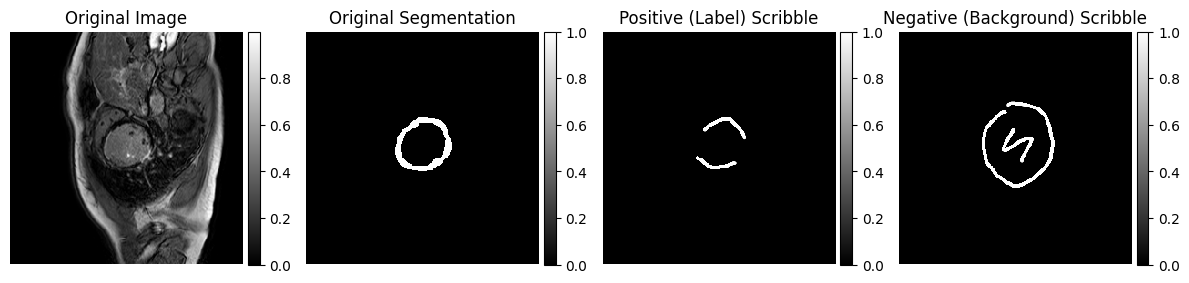

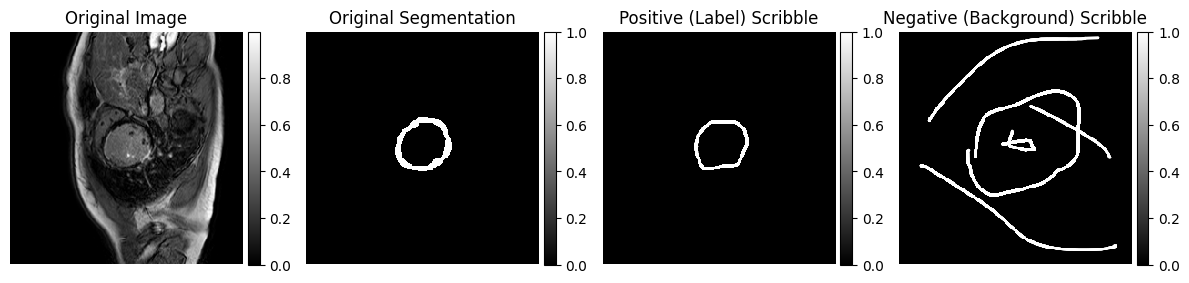

In [9]:
for i in range(len(x)):
    img, seg, manual_scribble = x[i]
    ne.plot.slices([img, seg, manual_scribble[0], manual_scribble[1]],
               titles = ["Original Image", "Original Segmentation", "Positive (Label) Scribble", "Negative (Background) Scribble"],
               do_colorbars=True, width=12)